In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import os
os.getcwd()
os.chdir('F:/')
os.listdir()
os.chdir('3. Implementing Logistic Regression')

In [10]:
df = pd.read_csv('data_cleaned.csv')
df.shape

(891, 25)

In [11]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x.shape,y.shape

((891, 24), (891,))

In [12]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=35)

In [13]:
# Normalaizing using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
train_x_scaled=scalar.fit_transform(train_x)
train_x_scaled=pd.DataFrame(train_x_scaled,columns=x.columns)
test_x_scaled=scalar.fit_transform(test_x)
test_x_scaled=pd.DataFrame(test_x_scaled,columns=x.columns)

In [14]:
# Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [15]:
logreg=LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Predicting over the training set
train_predict=logreg.predict(train_x)
train_predict

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [17]:
# Calculating f1 score
k=f1_score(train_predict,train_y)
print('Training f1 score ',k)

Training f1 score  0.7418032786885247


In [19]:
test_predict=logreg.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test f1 score ',k)

Test f1 score  0.7415730337078651


In [20]:
# Making predictions using predict_proba function
train_predict=logreg.predict_proba(train_x)
train_predict

array([[0.32450208, 0.67549792],
       [0.90926359, 0.09073641],
       [0.88998061, 0.11001939],
       ...,
       [0.93210833, 0.06789167],
       [0.88880472, 0.11119528],
       [0.89963817, 0.10036183]])

In [21]:
train_preds=train_predict[:,1]
train_preds

array([0.67549792, 0.09073641, 0.11001939, 0.07541397, 0.7565679 ,
       0.72811635, 0.13681981, 0.09792176, 0.51508403, 0.91245311,
       0.92778548, 0.12131398, 0.12248226, 0.78940428, 0.73045943,
       0.3983057 , 0.03159255, 0.66102751, 0.91889708, 0.09073641,
       0.42130459, 0.09776276, 0.69714493, 0.10746048, 0.16107675,
       0.41549991, 0.14107323, 0.8773668 , 0.95257247, 0.22841216,
       0.77538916, 0.97781031, 0.08409207, 0.66940864, 0.7541196 ,
       0.12248621, 0.12248012, 0.08801154, 0.81445812, 0.94253795,
       0.24458763, 0.12862708, 0.08210136, 0.47888498, 0.16631019,
       0.12248093, 0.83470582, 0.05014252, 0.91822361, 0.2274604 ,
       0.94164553, 0.24022399, 0.14108214, 0.89765515, 0.10319188,
       0.24167588, 0.09527468, 0.57883103, 0.09763314, 0.10997499,
       0.86565852, 0.5072645 , 0.87127087, 0.63913137, 0.65416236,
       0.85413071, 0.69975487, 0.47026145, 0.12857397, 0.11691657,
       0.03842705, 0.12031157, 0.93838643, 0.12248621, 0.10323

In [22]:
for i in range(len(train_preds)):
    if(train_preds[i]>.55):
        train_preds[i]=1
    else:
        train_preds[i]=0

In [23]:
k=f1_score(train_preds,train_y)
print('Training f1 score ',k)

Training f1 score  0.7315010570824525


In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(test_y,test_predict)
print(cf)

[[111  25]
 [ 21  66]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_y,test_predict))

precision    recall  f1-score   support

           0       0.84      0.82      0.83       136
           1       0.73      0.76      0.74        87

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [26]:
logreg.coef_

array([[-0.0356276 ,  0.00294089,  1.11533594, -0.04459045, -0.93349665,
         1.33877956, -1.20153071,  0.78504849,  0.8218073 ,  0.50129348,
        -0.7666192 , -0.47394819, -0.33595111, -0.39438193,  0.05761526,
         0.35495427, -0.14840105,  0.3036661 , -0.38963329, -0.04095245,
         0.        ,  0.11000377,  0.14068345, -0.11343838]])

Text(0.5, 1.0, 'Coeffecient plot')

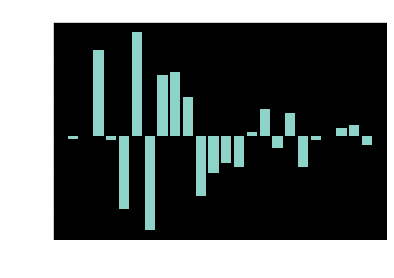

In [27]:
x=range(len(train_x.columns))
c=logreg.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel('Variables')
plt.ylabel('Coeffecients')
plt.title('Coeffecient plot')

In [28]:
Coeffecients=pd.DataFrame({'Variable':train_x.columns,'Coeffecient':abs(c)})
Coeffecients.head()

,Variable,Coeffecient
0,Age,0.035628
1,Fare,0.002941
2,Pclass_1,1.115336
3,Pclass_2,0.044590
4,Pclass_3,0.933497


In [30]:
# Selecting variables with high coeffecients
sign_var=Coeffecients[Coeffecients.Coeffecient>.3]

In [32]:
subset=df[sign_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_3,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0,0,0


In [35]:
# Using train test split
train_x,test_x,train_y,test_y=train_test_split(subset,y,random_state=14)

In [36]:
logreg=LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Predicting over train set
train_predict=logreg.predict(train_x)
k=f1_score(train_predict,train_y)
print('Training f1 score ',k)

Training f1 score  0.7116564417177915


Text(0.5, 1.0, 'Coeffecient plot')

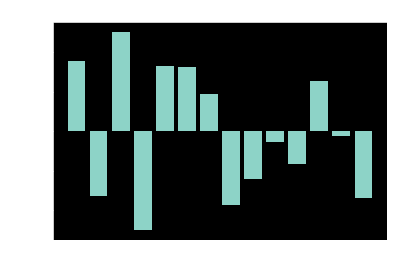

In [38]:
x=range(len(train_x.columns))
c=logreg.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel('Variables')
plt.ylabel('Coeffecients')
plt.title('Coeffecient plot')